In [64]:
import tensorflow as tf
from dask.delayed import optimize
from sympy.physics.units import action
from tensorflow import keras 
from keras.models import Model
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.layers import Dense
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np

In [15]:
tf

<module 'tensorflow' from '/opt/anaconda3/lib/python3.11/site-packages/tensorflow/__init__.py'>

In [35]:
data = {
    'X1': [0.5, 2.0, 1.5, 3.0, 0.0, 4.0, 3.5, 0.0, 2.5, 1.0],
    'X2': [1.0, 3.0, 2.5, 4.0, 0.5, 1.5, 2.0, 2.0, 3.5, 0.0],
    'Y1': [1.5, 5.0, 4.0, 7.0, 0.5, 5.5, 5.5, 2.0, 6.0, 1.0],
    'Y2': [-0.5, -1.0, -1.0, -1.0, -0.5, 2.5, 1.5, -2.0, -1.0, 1.0]
}

# Создаем DataFrame
data = pd.DataFrame(data)
data

,X1,X2,Y1,Y2
0,0.5,1.0,1.5,-0.5
1,2.0,3.0,5.0,-1.0
2,1.5,2.5,4.0,-1.0
3,3.0,4.0,7.0,-1.0
4,0.0,0.5,0.5,-0.5
5,4.0,1.5,5.5,2.5
6,3.5,2.0,5.5,1.5
7,0.0,2.0,2.0,-2.0
8,2.5,3.5,6.0,-1.0
9,1.0,0.0,1.0,1.0


In [36]:
# To build multiple-output model it is important to devide data this way

x = data.drop(["Y1", "Y2"], axis="columns")
y1 = data['Y1'].values
y2 = data['Y2'].values

In [37]:
#You also need to split it this way

x_train, x_test, y_train_1, y_test_1 = train_test_split(x, y1, test_size=0.2, random_state=42)
x_train, x_test, y_train_2, y_test_2 = train_test_split(x, y2, test_size=0.2, random_state=42)


In [57]:

inputs = tf.keras.Input(shape = (2, ))

x = Dense(12, activation="relu")(inputs)
x = Dense(8, activation="relu")(x)
x = Dense(4, activation="relu")(x)

# Two outputs
y_1 = Dense(1, activation="linear", name="pred1")(x)
y_2 = Dense(1, activation="linear", name="pred2")(x)

model = Model(inputs=inputs, outputs=[y_1, y_2])

model.compile(optimizer=Adam(learning_rate=1e-2),
              loss={"pred1": "mse", "pred2": "mse"},
              metrics = {"pred1": "mae", "pred2": "mae"})

In [51]:
y_train

,Y1,Y2
7,2.0,-2.0
6,5.5,1.5
0,1.5,-0.5
4,0.5,-0.5
8,6.0,-1.0
1,5.0,-1.0
3,7.0,-1.0
5,5.5,2.5


In [58]:
# Important to fit data this way_
history = model.fit(x_train, {"pred1": y_train_1, "pred2": y_train_2}, epochs=100, validation_split=0.2)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 968ms/step - loss: 9.4712 - pred1_mae: 2.1302 - pred2_mae: 1.2120 - val_loss: 34.9822 - val_pred1_mae: 5.7584 - val_pred2_mae: 1.1339
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 8.5366 - pred1_mae: 1.9595 - pred2_mae: 1.1619 - val_loss: 31.3914 - val_pred1_mae: 5.4651 - val_pred2_mae: 1.0586
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 7.3576 - pred1_mae: 1.7328 - pred2_mae: 1.1174 - val_loss: 26.3714 - val_pred1_mae: 5.0044 - val_pred2_mae: 1.0120
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 6.1669 - pred1_mae: 1.5101 - pred2_mae: 1.0714 - val_loss: 20.3472 - val_pred1_mae: 4.3794 - val_pred2_mae: 0.9585
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 5.0238 - pred1_mae: 1.2872 - pred2_mae: 1.0249 - val_loss: 14.8493 - val_pred1_mae: 3.7175 - val_pred2_mae: 0.9038
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 3.7564 - pred1_mae: 1.0701 - pred2_mae: 0.9759 - val_loss: 9.7992 - val_pred

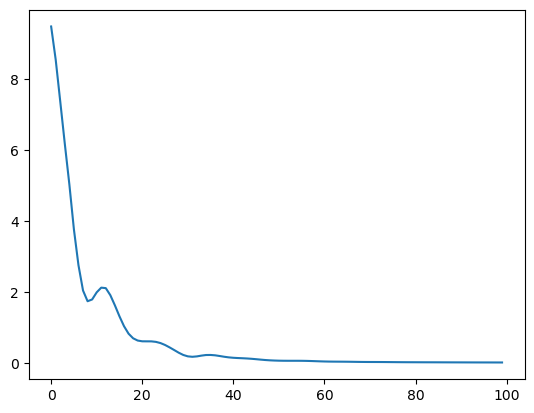

In [59]:
plt.plot(history.history["loss"])

In [77]:
arr = np.array([[1, 0]])  
predictions = model.predict(arr)
print(predictions[0][0][0], predictions[1][0][0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1.0335673 0.9684551
